In [6]:
import sys
sys.path.append("repo/src")

import torch
import torch.nn as nn
import numpy as np

from VPINN import *
from train import train

# Model for the approximation of u

In [7]:
class MLP(nn.Module):
    
    def __init__(self, layers, activation, bias = True, datas = None):
        
        super().__init__()
        
        self.activation = activation
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1], bias = bias, dtype = torch.double)
                                      for i in range(len(layers)-1)])
        
        if datas is not None:
            for data, lin in zip(datas, self.linears):
                lin.weight.data = data['weight']
                if lin.bias is not None:
                    lin.bias.data = data['bias']
        else:
            for lin in self.linears:
                for n, p in lin.named_parameters():
                    if 'weight' in n:
                      nn.init.xavier_normal_(p)
                    elif 'bias' in n:
                      nn.init.zeros_(p)
        
    def forward(self, x):
        
        for i, lin in enumerate(self.linears):
            x = lin(x)
            if i < len(self.linears)-1:
                x = self.activation(x)
                
        return x

# VPINN

In [8]:
# Problem Parameters
'''
a, b = -1, 1
A, w, r = 0.1, 4*np.pi, 0.01
u_ex = lambda x: A*torch.sin(w*x) + torch.exp((r-(x+1))/r)
u_left = u_ex(torch.tensor([a], dtype = torch.double))
u_right = u_ex(torch.tensor([b], dtype = torch.double))
source = lambda x: A*w**2*torch.sin(w*x) - torch.exp((r-(x+1))/r) / r**2
'''

a, b = -1, 1
A, w, r = 0.1, 4*np.pi, 5
u_ex = lambda x: A*torch.sin(w*x) + torch.tanh(r*x)
u_left = u_ex(torch.tensor([a], dtype = torch.double))
u_right = u_ex(torch.sin(torch.tensor([b], dtype = torch.double)))
source = lambda x: A * w**2 * torch.sin(w*x) + 2 * r**2 * torch.tanh(r*x) / torch.cosh(r*x)**2


# Model Parameters
method = 1
num_points = 100
num_sine_test_functions = 0
num_poly_test_functions = 40
boundary_penalty = 10
layers = [1, 20, 1]
activation = nn.Tanh()

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 7.944114e+00, Loss Boundary = 3.213198e+01: 100%|██████████| 1000/1000 [02:42<00:00,  6.16it/s]


Training Over


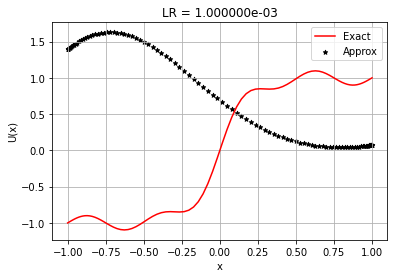

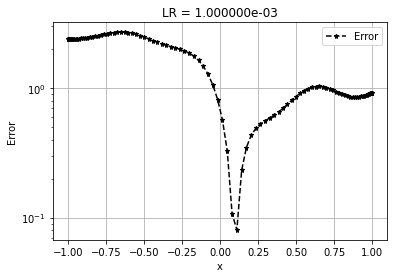

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 7.708340e+00, Loss Boundary = 9.764268e+00: 100%|██████████| 1000/1000 [02:52<00:00,  5.81it/s]


Training Over


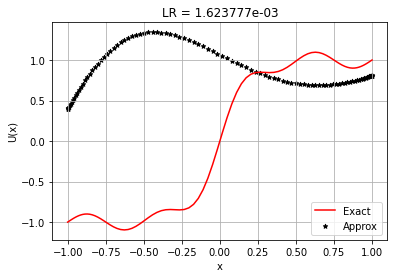

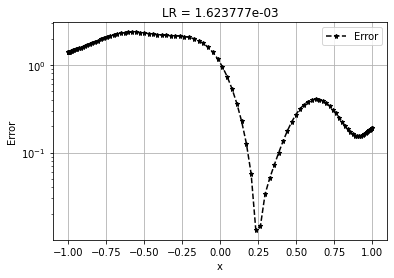

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 6.945942e+00, Loss Boundary = 2.851764e-03: 100%|██████████| 1000/1000 [02:30<00:00,  6.66it/s]


Training Over


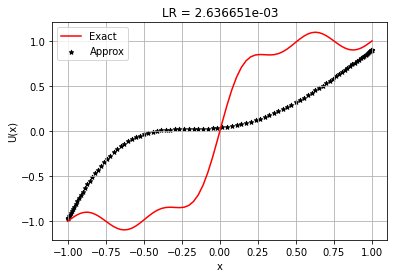

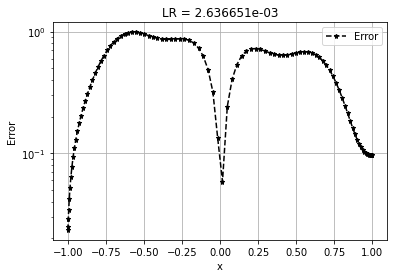

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 6.610076e+00, Loss Boundary = 2.925297e-02: 100%|██████████| 1000/1000 [02:54<00:00,  5.73it/s]


Training Over


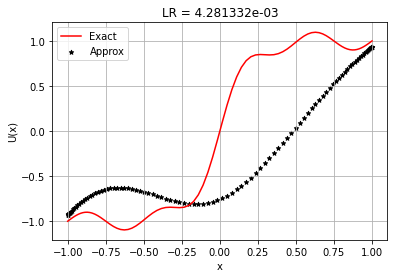

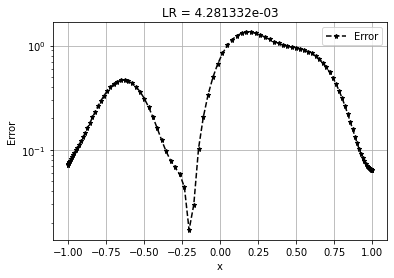

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 6.719633e+00, Loss Boundary = 2.846133e-03: 100%|██████████| 1000/1000 [02:40<00:00,  6.22it/s]


Training Over


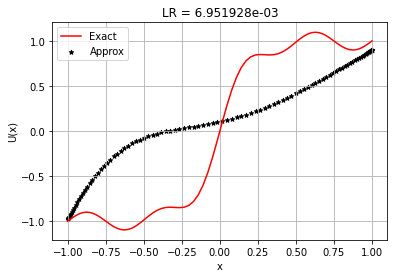

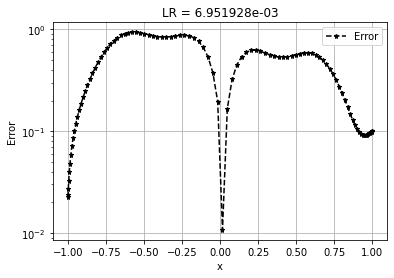

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 7.119717e+00, Loss Boundary = 1.067348e-03: 100%|██████████| 1000/1000 [02:54<00:00,  5.74it/s]


Training Over


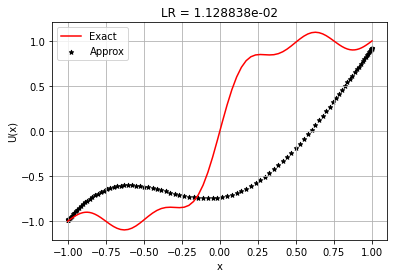

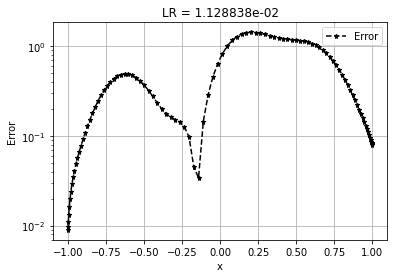

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 6.435859e+00, Loss Boundary = 7.354323e-04: 100%|██████████| 1000/1000 [02:40<00:00,  6.21it/s]


Training Over


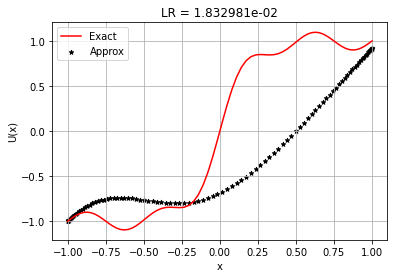

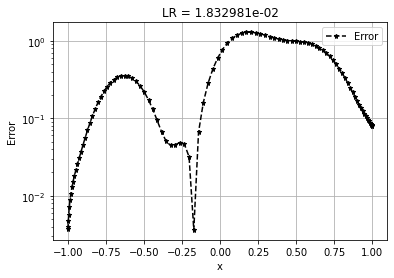

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 6.405529e+00, Loss Boundary = 4.271128e-04: 100%|██████████| 1000/1000 [02:57<00:00,  5.63it/s]


Training Over


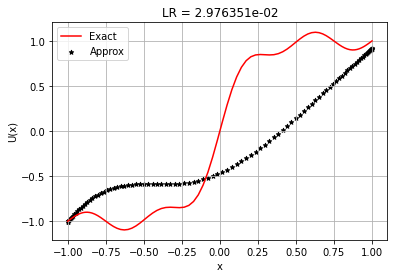

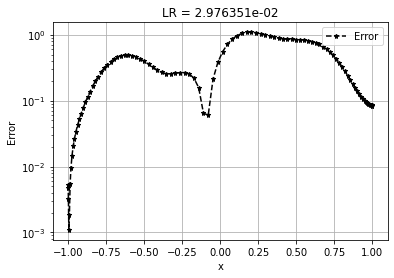

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 5.833973e+00, Loss Boundary = 1.936117e-03: 100%|██████████| 1000/1000 [02:42<00:00,  6.16it/s]


Training Over


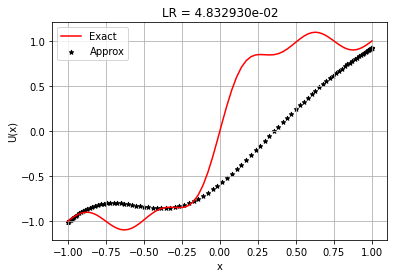

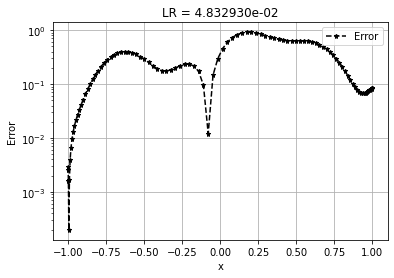

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 5.532722e+00, Loss Boundary = 1.620509e-03: 100%|██████████| 1000/1000 [02:23<00:00,  6.96it/s]


Training Over


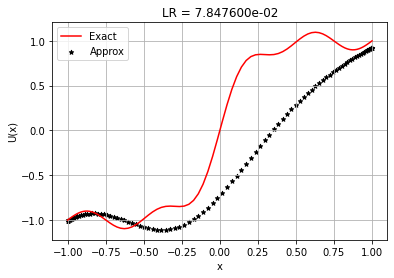

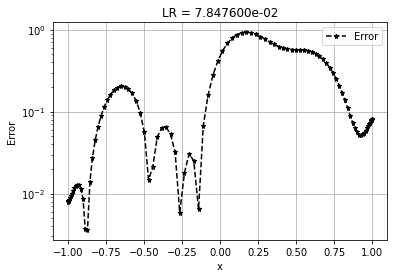

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 5.463628e+00, Loss Boundary = 6.162033e-04: 100%|██████████| 1000/1000 [02:45<00:00,  6.04it/s]


Training Over


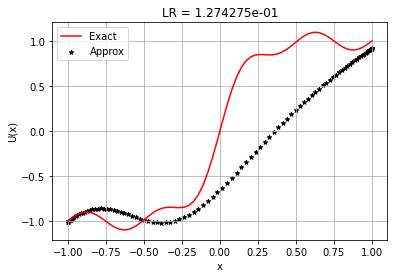

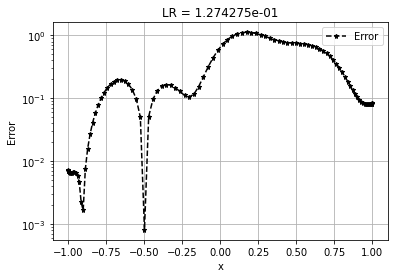

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 2.436869e+01, Loss Boundary = 1.156336e+00: 100%|██████████| 1000/1000 [02:50<00:00,  5.86it/s]


Training Over


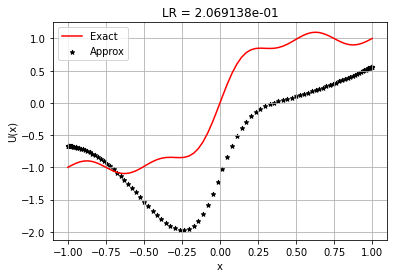

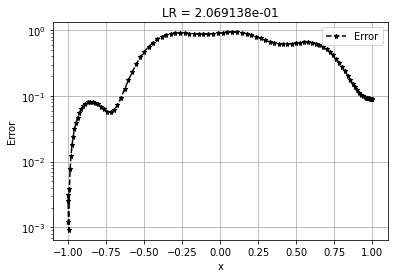

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 2.690600e+00, Loss Boundary = 5.245659e-05: 100%|██████████| 1000/1000 [02:55<00:00,  5.70it/s]


Training Over


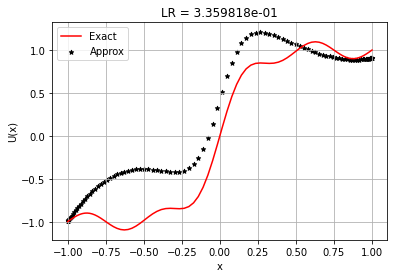

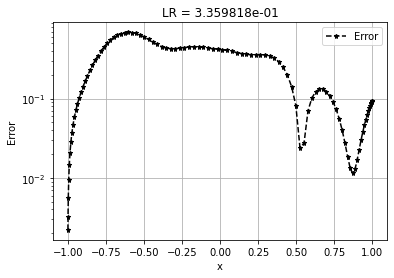

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 3.672611e+03, Loss Boundary = 2.179376e+01: 100%|██████████| 1000/1000 [02:34<00:00,  6.48it/s]


Training Over


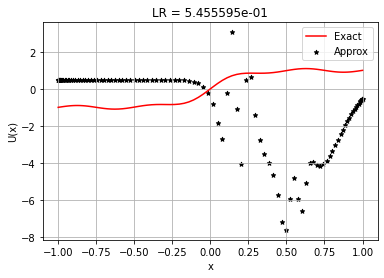

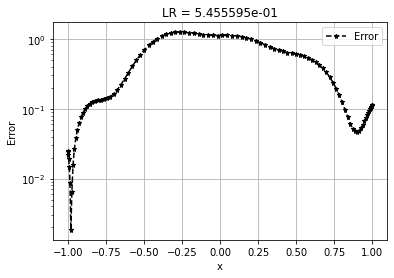

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 5.416967e+03, Loss Boundary = 9.365808e-01: 100%|██████████| 1000/1000 [02:28<00:00,  6.75it/s]


Training Over


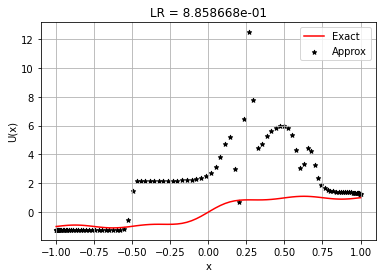

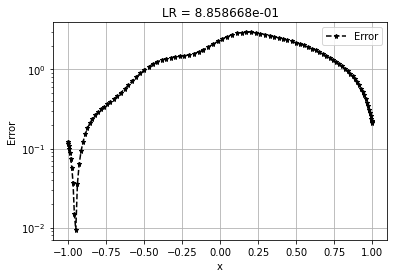

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 5.333727e+03, Loss Boundary = 5.127134e+01: 100%|██████████| 1000/1000 [02:21<00:00,  7.06it/s]


Training Over


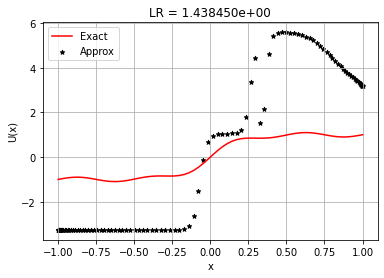

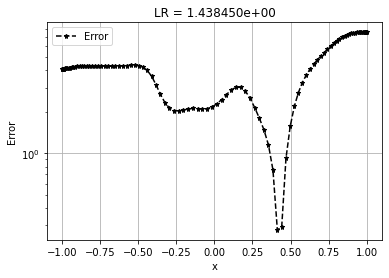

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 1.737036e+04, Loss Boundary = 2.391241e+02: 100%|██████████| 1000/1000 [03:00<00:00,  5.55it/s]


Training Over


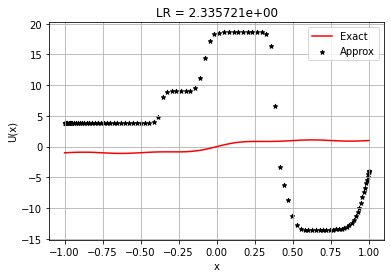

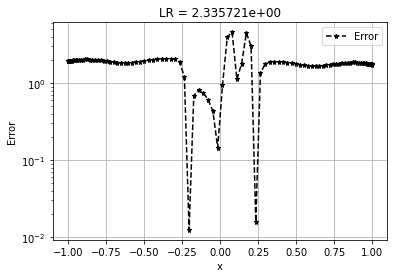

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 4.333908e+03, Loss Boundary = 5.914888e+01: 100%|██████████| 1000/1000 [02:47<00:00,  5.98it/s]


Training Over


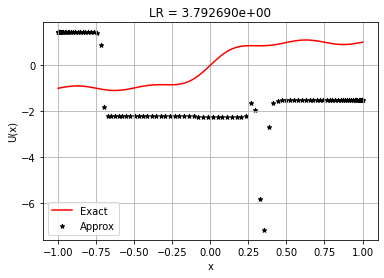

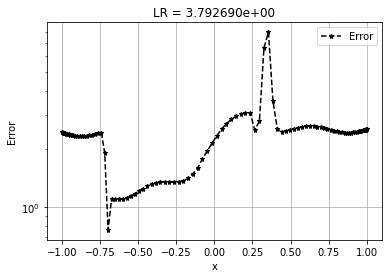

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 5.156743e+03, Loss Boundary = 2.431428e+02: 100%|██████████| 1000/1000 [02:53<00:00,  5.75it/s]


Training Over


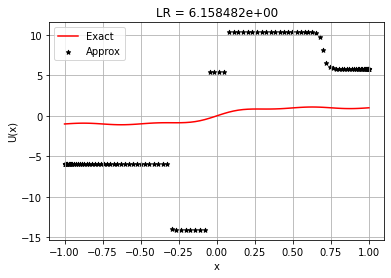

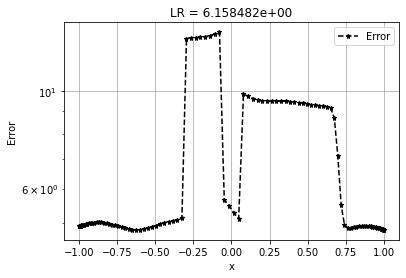

C:\Users\axeld\miniconda3\lib\site-packages\scipy\special\orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
Loss Interior = 9.712433e+04, Loss Boundary = 2.842223e+03: 100%|██████████| 1000/1000 [03:09<00:00,  5.27it/s]


Training Over


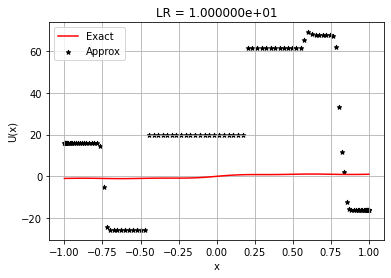

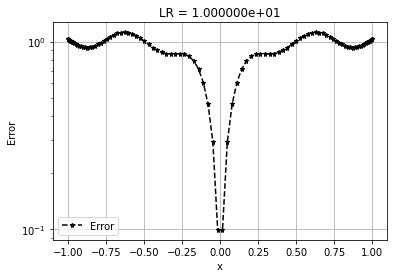

In [9]:
# Optimization Parameters
device = 'cuda' if torch.cuda.is_available() else 'cpu'
num_iter = 1000
lr = 1

for lr in np.logspace(-3, 1, 20):
    u_approx = MLP(layers, activation, bias = True, datas = None)
    vpinn = VPINN_Laplace_Dirichlet(a, b, u_left, u_right, source,
                                        num_points, num_sine_test_functions, num_poly_test_functions, 
                                        boundary_penalty, u_approx, u_ex, device =  device)

    optimizer = torch.optim.Adam(vpinn.parameters(), lr = lr)

    # train will only keep the model which returned the best loss
    train(vpinn, optimizer, num_iter, 1, tol = 1e-32, save_gradients=False)
    vpinn.plot()
    plt.title("LR = {:e}".format(lr))
    plt.show()
    vpinn.compute_error()
    vpinn.plot_error()
    plt.title("LR = {:e}".format(lr))
    plt.show()